In [1]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,max_error

def split_x_and_y(database,x,y):
  dataset_x = database[x]
  dataset_y = database[y]
  return dataset_x,dataset_y


def scores(Y_true, Y_predicted):
  r2 = r2_score(Y_true, Y_predicted)
  meansquarederror = mean_squared_error(Y_true, Y_predicted)
  meanabsoluteerror = mean_absolute_error(Y_true, Y_predicted)
  maxerror = max_error(Y_true, Y_predicted)

  print('r2:',r2,'meansquarederror:',meansquarederror,'meanabsoluteerror:',meanabsoluteerror,'maxerror:',maxerror)
  return r2,meansquarederror,meanabsoluteerror,maxerror
  

# NUSSELT

In [2]:
import pandas as pd
database_pre = pd.read_excel('database_TCC.xlsx')
database = database_pre[['A','E','N','Nu']]
database

,A,E,N,Nu
0,25,1,11,78.62
1,25,1,5,102.00
2,25,2,8,91.57
3,25,3,11,31.00
4,25,3,5,88.97
5,35,1,8,96.90
6,35,2,11,61.80
7,35,2,5,93.30
8,35,3,8,76.90
9,25,1,8,98.34


In [3]:
import pickle

with open("standard_scaler_Nu.pkl", "rb") as f:
    rawdata = f.read()

standard_scaler_nu = pickle.loads(rawdata)
data = standard_scaler_nu.transform(database)
database = pd.DataFrame(data,columns=database.columns)

### Decision Tree Regressor

In [4]:
with open("Decision_Tree_Regressor_Nu.pkl", "rb") as f:
    rawdata = f.read()
decision_tree_regressor_nu = pickle.loads(rawdata)

In [5]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Nu')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Nu')

decision_tree_regressor_nu.score(test_x,test_y)

0.9897242898141063

In [6]:
decision_tree_regressor_nu.feature_importances_

array([0.05821648, 0.33288972, 0.6088938 ])

In [7]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = decision_tree_regressor_nu.predict(test_x)
desnormalizado_teste = standard_scaler_nu.inverse_transform(desnormalizar)
desnormalizado_teste

array([[ 25. ,   1. ,   8. , 102. ],
       [ 25. ,   2. ,   5. ,  93.3],
       [ 35. ,   3. ,  11. ,  31. ]])

In [8]:
decision_tree_results = desnormalizado_teste[:,-1]

In [9]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = test_y
desnormalizado_resultado = standard_scaler_nu.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.  ,  1.  ,  8.  , 98.34],
       [25.  ,  2.  ,  5.  , 89.62],
       [35.  ,  3.  , 11.  , 31.47]])

### Linear Regression with Polynomial Preprocessing

In [10]:
with open("Linear_Regression_with_Poly_Nu.pkl", "rb") as f:
    rawdata = f.read()
linear_regression_nu = pickle.loads(rawdata)

In [11]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Nu')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Nu')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(4,interaction_only=False,include_bias=False)
LR = LinearRegression()

dataset_x_transformed = poly.fit_transform(dataset_x)
test_x_transformed = poly.fit_transform(test_x)

linear_regression_nu.score(test_x_transformed,test_y)

0.96034797005603

In [12]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = linear_regression_nu.predict(test_x_transformed)
desnormalizado_teste = standard_scaler_nu.inverse_transform(desnormalizar)
desnormalizado_teste

array([[25.        ,  1.        ,  8.        , 96.64663975],
       [25.        ,  2.        ,  5.        , 94.93308063],
       [35.        ,  3.        , 11.        , 40.05514906]])

In [13]:
linear_regression_results = desnormalizado_teste[:,-1]

In [14]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = test_y
desnormalizado_resultado = standard_scaler_nu.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.  ,  1.  ,  8.  , 98.34],
       [25.  ,  2.  ,  5.  , 89.62],
       [35.  ,  3.  , 11.  , 31.47]])

### Keras

In [22]:
from keras.models import load_model
keras_nu = load_model('keras_model_Nu.h5')

dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Nu')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Nu')

In [23]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = keras_nu.predict(test_x.values)
desnormalizado_teste = standard_scaler_nu.inverse_transform(desnormalizar)
desnormalizado_teste

1/1 [==============================] - 0s 167ms/step


array([[25.        ,  1.        ,  8.        , 96.37617291],
       [25.        ,  2.        ,  5.        , 96.63502646],
       [35.        ,  3.        , 11.        , 32.7789412 ]])

In [24]:
keras_results = desnormalizado_teste[:,-1]

In [25]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = test_y
desnormalizado_resultado = standard_scaler_nu.inverse_transform(desnormalizar)
desnormalizado_resultado

answers = desnormalizado_resultado[:,-1]

In [26]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: 0.9792734994843473 meansquarederror: 18.260180064482245 meanabsoluteerror: 3.4292649169595086 maxerror: 7.015026464920979


(0.9792734994843473, 18.260180064482245, 3.4292649169595086, 7.015026464920979)

# RESULTS

In [41]:
df_results_nu = pd.DataFrame(database_pre.iloc[[9,10,11]][['A','E','N','Nu']])
df_results_nu['Decision Tree Regressor'] = decision_tree_results
df_results_nu['Linear Regression'] = linear_regression_results
df_results_nu['Keras'] = keras_results

In [42]:
df_results_nu

,A,E,N,Nu,Decision Tree Regressor,Linear Regression,Keras
9,25,1,8,98.34,102.0,96.646640,96.376173
10,25,2,5,89.62,93.3,94.933081,96.635026
11,35,3,11,31.47,31.0,40.055149,32.778941


In [56]:
# df_results_nu['average'] = df_results_nu[['Decision Tree Regressor','Linear Regression','Keras']].mean(axis=1)
df_results_nu['average'] = df_results_nu[['Decision Tree Regressor','Keras']].mean(axis=1)

In [57]:
df_results_nu

,A,E,N,Nu,Decision Tree Regressor,Linear Regression,Keras,average
9,25,1,8,98.34,102.0,96.646640,96.376173,99.188086
10,25,2,5,89.62,93.3,94.933081,96.635026,94.967513
11,35,3,11,31.47,31.0,40.055149,32.778941,31.889471


In [58]:
scores(df_results_nu['Nu'],df_results_nu['average'])

r2: 0.9888418883793776 meansquarederror: 9.83036799764074 meanabsoluteerror: 2.2050234294945903 maxerror: 5.347513232460486


(0.9888418883793776, 9.83036799764074, 2.2050234294945903, 5.347513232460486)

In [59]:
df_delta_nu = pd.DataFrame(database_pre.iloc[[9,10,11]][['A','E','N','Nu']])
df_delta_nu['Decision Tree Regressor'] = (abs((df_results_nu['Decision Tree Regressor'] - df_results_nu['Nu'])/df_results_nu['Nu'])*100).round(2)
df_delta_nu['Linear Regression'] = (abs((df_results_nu['Linear Regression'] - df_results_nu['Nu'])/df_results_nu['Nu'])*100).round(2)
df_delta_nu['Keras'] = (abs((df_results_nu['Keras'] - df_results_nu['Nu'])/df_results_nu['Nu'])*100).round(2)
df_delta_nu['average'] = (abs((df_results_nu['average'] - df_results_nu['Nu'])/df_results_nu['Nu'])*100).round(2)

In [60]:
df_delta_nu[['Decision Tree Regressor','Linear Regression','Keras','average']] = df_delta_nu[['Decision Tree Regressor','Linear Regression','Keras','average']].applymap(lambda x: str(x) + '%')

In [61]:
df_delta_nu

,A,E,N,Nu,Decision Tree Regressor,Linear Regression,Keras,average
9,25,1,8,98.34,3.72%,1.72%,2.0%,0.86%
10,25,2,5,89.62,4.11%,5.93%,7.83%,5.97%
11,35,3,11,31.47,1.49%,27.28%,4.16%,1.33%


# TEST MODELS

## Decision Tree Regressor

In [63]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for N in [5,6,7,8,9,10,11]:
    # print(N)
    normalizado = standard_scaler_nu.transform([[A,E,N,NU]])[:,:3]
    resultado = decision_tree_regressor_nu.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_nu.inverse_transform(resultado_df)
    outcome = list(standard_scaler_nu.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

[[-0.84515425 -1.22474487 -1.22474487]] [1.00309266]
[[-0.84515425 -1.22474487 -0.81649658]] [1.00309266]
[[-0.84515425 -1.22474487 -0.40824829]] [1.00309266]
[[-0.84515425 -1.22474487  0.        ]] [1.00309266]
[[-0.84515425 -1.22474487  0.40824829]] [1.00309266]
[[-0.84515425 -1.22474487  0.81649658]] [0.01043746]
[[-0.84515425 -1.22474487  1.22474487]] [0.01043746]


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.wa

,A,E,N,Nu
0,25.0,1.0,5.0,102.00
1,25.0,1.0,6.0,102.00
2,25.0,1.0,7.0,102.00
3,25.0,1.0,8.0,102.00
4,25.0,1.0,9.0,102.00
5,25.0,1.0,10.0,78.62
6,25.0,1.0,11.0,78.62


In [64]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for E in [1,2,3]:
    # print(N)
    normalizado = standard_scaler_nu.transform([[A,E,N,NU]])[:,:3]
    resultado = decision_tree_regressor_nu.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_nu.inverse_transform(resultado_df)
    outcome = list(standard_scaler_nu.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

[[-0.84515425 -1.22474487  1.22474487]] [0.01043746]
[[-0.84515425  0.          1.22474487]] [0.01043746]
[[-0.84515425  1.22474487  1.22474487]] [-2.01138637]


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.wa

,A,E,N,Nu
0,25.0,1.0,11.0,78.62
1,25.0,2.0,11.0,78.62
2,25.0,3.0,11.0,31.00


In [65]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for A in [25,30,35]:
    # print(N)
    normalizado = standard_scaler_nu.transform([[A,E,N,NU]])[:,:3]
    resultado = decision_tree_regressor_nu.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_nu.inverse_transform(resultado_df)
    outcome = list(standard_scaler_nu.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

[[-0.84515425 -1.22474487  1.22474487]] [0.01043746]
[[ 0.16903085 -1.22474487  1.22474487]] [0.01043746]
[[ 1.18321596 -1.22474487  1.22474487]] [-0.70369687]


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.wa

,A,E,N,Nu
0,25.0,1.0,11.0,78.62
1,30.0,1.0,11.0,78.62
2,35.0,1.0,11.0,61.80


## Keras

In [77]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for N in [4,5,6,7,8,9,10,11]:
    # print(N)
    normalizado = standard_scaler_nu.transform([[A,E,N,NU]])[:,:3]
    resultado = keras_nu.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_nu.inverse_transform(resultado_df)
    outcome = list(standard_scaler_nu.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

1/1 [==============================] - 0s 15ms/step
[[-0.84515425 -1.22474487 -1.63299316]] [[0.79867053]]
1/1 [==============================] - 0s 14ms/step
[[-0.84515425 -1.22474487 -1.22474487]] [[0.7959038]]
1/1 [==============================] - 0s 18ms/step
[[-0.84515425 -1.22474487 -0.81649658]] [[0.7911991]]
1/1 [==============================] - 0s 15ms/step


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[-0.84515425 -1.22474487 -0.40824829]] [[0.7824813]]
1/1 [==============================] - 0s 15ms/step
[[-0.84515425 -1.22474487  0.        ]] [[0.7643193]]
1/1 [==============================] - 0s 13ms/step
[[-0.84515425 -1.22474487  0.40824829]] [[0.7196244]]
1/1 [==============================] - 0s 13ms/step
[[-0.84515425 -1.22474487  0.81649658]] [[0.5807706]]
1/1 [==============================] - 0s 14ms/step
[[-0.84515425 -1.22474487  1.22474487]] [[0.04864833]]


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,A,E,N,Nu
0,25.0,1.0,4.0,97.185247
1,25.0,1.0,5.0,97.120082
2,25.0,1.0,6.0,97.009272
3,25.0,1.0,7.0,96.803943
4,25.0,1.0,8.0,96.376173
5,25.0,1.0,9.0,95.323474
6,25.0,1.0,10.0,92.053052
7,25.0,1.0,11.0,79.519980


A: 25 E: 1 N: 11 Nu: 0


<AxesSubplot:xlabel='N', ylabel='Nu'>

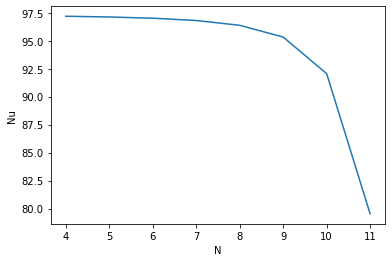

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

print('A:',A,'E:',E,'N:',N,'Nu:',NU)
sns.lineplot(x="N", y='Nu',data=dataframe_output,ci=None)

In [70]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for E in [1,2,3,4]:
    # print(N)
    normalizado = standard_scaler_nu.transform([[A,E,N,NU]])[:,:3]
    resultado = keras_nu.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_nu.inverse_transform(resultado_df)
    outcome = list(standard_scaler_nu.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

1/1 [==============================] - 0s 18ms/step
[[-0.84515425 -1.22474487  1.22474487]] [[0.04864833]]
1/1 [==============================] - 0s 17ms/step
[[-0.84515425  0.          1.22474487]] [[-1.883671]]
1/1 [==============================] - 0s 17ms/step
[[-0.84515425  1.22474487  1.22474487]] [[-1.9799429]]
1/1 [==============================] - ETA: 0s

C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 15ms/step
[[-0.84515425  2.44948974  1.22474487]] [[-1.988302]]


,A,E,N,Nu
0,25.0,1.0,11.0,79.519980
1,25.0,2.0,11.0,34.008078
2,25.0,3.0,11.0,31.740587
3,25.0,4.0,11.0,31.543706


<AxesSubplot:xlabel='E', ylabel='Nu'>

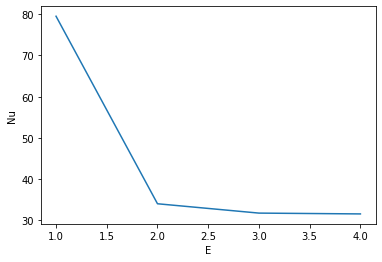

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x="E", y='Nu',data=dataframe_output,ci=None)

In [73]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for A in [20,25,30,35,40]:
    # print(N)
    normalizado = standard_scaler_nu.transform([[A,E,N,NU]])[:,:3]
    resultado = keras_nu.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_nu.inverse_transform(resultado_df)
    outcome = list(standard_scaler_nu.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

1/1 [==============================] - 0s 14ms/step
[[-1.85933936 -1.22474487  1.22474487]] [[-1.084265]]
1/1 [==============================] - 0s 16ms/step
[[-0.84515425 -1.22474487  1.22474487]] [[0.04864833]]
1/1 [==============================] - 0s 14ms/step
[[ 0.16903085 -1.22474487  1.22474487]] [[0.5610416]]
1/1 [==============================] - 0s 14ms/step
[[ 1.18321596 -1.22474487  1.22474487]] [[0.7051295]]
1/1 [==============================] - ETA: 0s

C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 16ms/step
[[ 2.19740106 -1.22474487  1.22474487]] [[0.7533684]]


,A,E,N,Nu
0,20.0,1.0,11.0,52.836482
1,25.0,1.0,11.0,79.519980
2,30.0,1.0,11.0,91.588375
3,35.0,1.0,11.0,94.982076
4,40.0,1.0,11.0,96.118246


<AxesSubplot:xlabel='A', ylabel='Nu'>

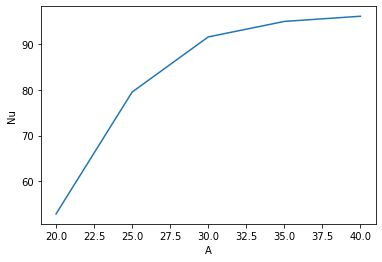

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x="A", y='Nu',data=dataframe_output,ci=None)